What is the best economic domain/industry to invest in (return, risk, stability)? Over all countries, over specific countries/world regions

How is best defined?
Return, risk, stability

Examine a major industries (food, financial, health etc) and determine a goodness score consisting of return, stability and risk

Examine these industries in general and divided by regions etc
(If you are in Africa it is best to invest here etc)

Focus on s&p 500
1. analyse different industries in s&p 500

# Data Visualization Final Project | Industries of the S&P 500 

Scientific Question: How does the risk and return profile vary across different sectors in the stock market, and can sector-specific patterns be identified to inform investment decisions?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [24]:
stocks = pd.read_csv('data/company_list/sp500_companies.csv')
industries = stocks['GICS Sector'].unique()
industries_occ = stocks['GICS Sector'].value_counts()

print(stocks.head())
print(industries)

  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  
['Industrials' 'Health Care' 'Information Technology' 'Utilities'
 'Financials' 'Materials' 'Consumer Discretionary' 'Real Estate'
 'Co

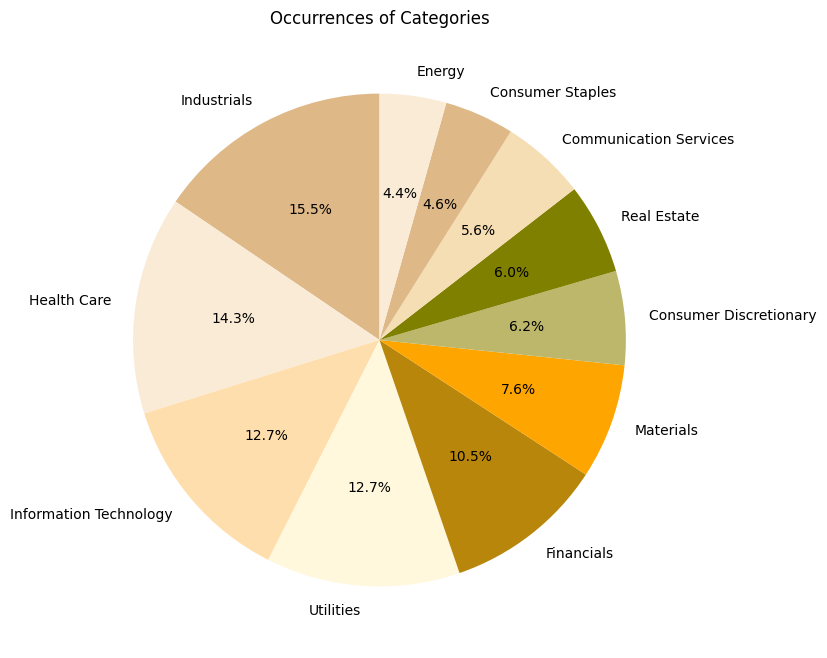

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(industries_occ, labels=industries, autopct='%1.1f%%', startangle=90, colors=['burlywood','antiquewhite','navajowhite','cornsilk','darkgoldenrod','orange','darkkhaki','olive','wheat'])
plt.title('Occurrences of Categories')
plt.show()

### Expand Dataset

In [21]:
def calc_avg_return(closing_prices: pd.Series) -> np.float64:
    daily_return = np.diff(closing_prices)
    return np.mean(daily_return)

In [25]:
#expand sp500_companies.csv to include average return and standard deviation (volatility) of each stock
dir_path = 'data/historical_stock_data/individual_stocks_5yr/'
avg_return = []
std_dev = []
name = []

for filename in tqdm(os.listdir(dir_path)):
    if filename.endswith(".csv"):
        file_path = os.path.join(dir_path, filename)
        hist_data = pd.read_csv(file_path)

        avg_return.append(calc_avg_return(hist_data['close']))
        std_dev.append(np.std(hist_data['close']))
        name.append(hist_data['Name'][0])
            
expansion_df = pd.DataFrame({'Avg_return': avg_return, 'Std_dev': std_dev, 'Symbol': name})
stocks = pd.merge(stocks, expansion_df, on='Symbol', how='left')
print(stocks.shape)
print(stocks.info())


  0%|          | 0/506 [00:00<?, ?it/s]

100%|██████████| 506/506 [00:11<00:00, 45.62it/s]

(503, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 503 non-null    object 
 1   Security               503 non-null    object 
 2   GICS Sector            503 non-null    object 
 3   GICS Sub-Industry      503 non-null    object 
 4   Headquarters Location  503 non-null    object 
 5   Date added             503 non-null    object 
 6   CIK                    503 non-null    int64  
 7   Founded                503 non-null    object 
 8   Avg_return             385 non-null    float64
 9   Std_dev                385 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 43.2+ KB
None


In [27]:
def scatter_plot_stocks(stocks: pd.DataFrame) -> None:
    industry_colors = {industry: np.random.rand(3,) for industry in stocks['GICS Sector'].unique()}
    plt.figure(figsize=(10, 6))

    for industry, color in industry_colors.items():
        industry_data = stocks[stocks['GICS Sector'] == industry]
        plt.scatter(industry_data['Avg_return'], industry_data['Std_dev'], label=industry, alpha=0.5, c=[color], s=30)

    plt.title('Scatter Plot of Average Return vs. Standard Deviation by Industry')
    plt.xlabel('Average Return')
    plt.ylabel('Standard Deviation (Volatility)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

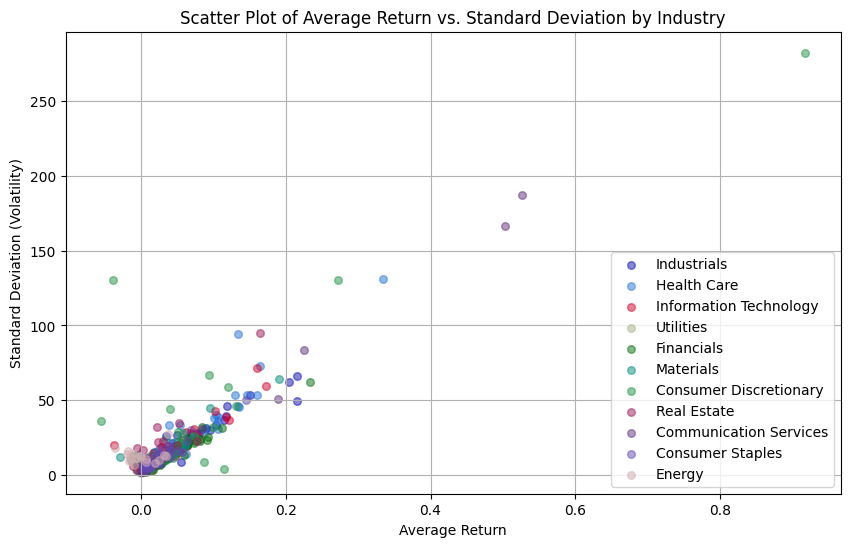

In [28]:
scatter_plot_stocks(stocks)

In [30]:
filtered_stocks = stocks.copy()

# Define conditions for filtering
condition_avg_return = filtered_stocks['Avg_return'] <= 0.2
condition_std_dev = filtered_stocks['Std_dev'] <= 100

# Apply the conditions and keep only rows that satisfy both conditions
filtered_stocks = filtered_stocks[condition_avg_return & condition_std_dev]

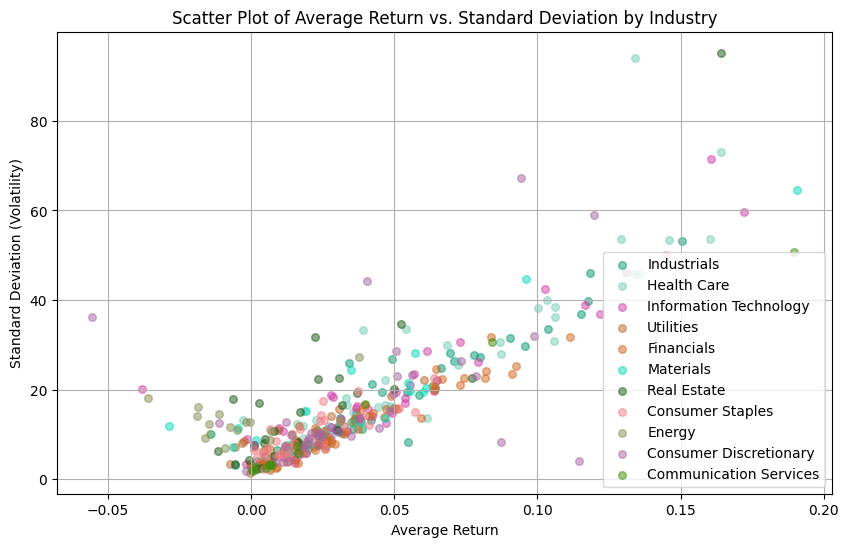

In [31]:
scatter_plot_stocks(filtered_stocks)

In [40]:
industry_stats = filtered_stocks.groupby('GICS Sector').agg({'Avg_return': 'mean', 'Std_dev': 'std'}).reset_index()

industry_stats['Avg_return_normalized'] = (industry_stats['Avg_return'] - industry_stats['Avg_return'].min()) / (industry_stats['Avg_return'].max() - industry_stats['Avg_return'].min())
industry_stats['Std_dev_normalized'] = (industry_stats['Std_dev'] - industry_stats['Std_dev'].min()) / (industry_stats['Std_dev'].max() - industry_stats['Std_dev'].min())

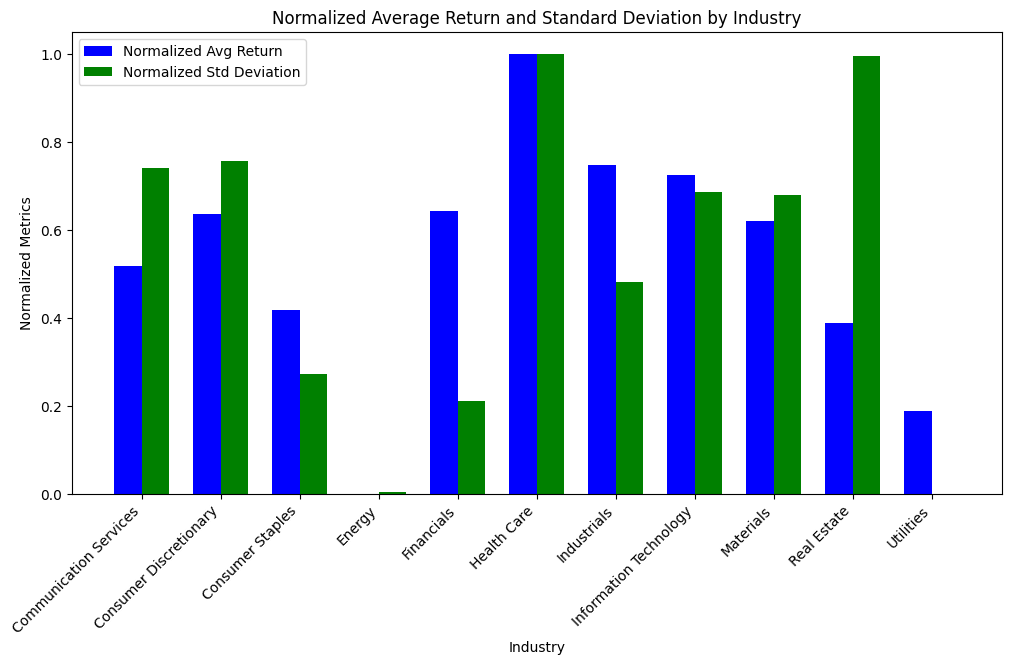

In [42]:
plt.figure(figsize=(12, 6))

bar_width = 0.35  # Width of each bar

# Create numerical positions for each industry
industries = np.arange(len(industry_stats['GICS Sector']))

# Bar graph for Normalized Average Return
plt.bar(industries, industry_stats['Avg_return_normalized'], width=bar_width, label='Return', color='blue')

# Bar graph for Normalized Standard Deviation
plt.bar(industries + bar_width, industry_stats['Std_dev_normalized'], width=bar_width, label='Risk', color='green')

# Set x-axis ticks to industry names
plt.xticks(industries + bar_width / 2, industry_stats['GICS Sector'], rotation=45, ha='right')

plt.title('Normalized Average Return and Standard Deviation by Industry')
plt.xlabel('Industry')
plt.ylabel('Normalized Metrics')
plt.legend()

plt.show()